# Lab 3.1 - Text Classification

This notebook demonstrates the complete text classification pipeline:
1. Loading embeddings from Lab 2
2. SVM experiments with different kernels and iterations
3. Model comparison (SVM vs MLP)
4. Vector transformation experiments
5. Results analysis and visualization



In [1]:
# Import necessary libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Add source directory to path
sys.path.append('source')

from source.data_loader import load_test_data
from source.metrics import accuracy, precision, recall, f1_score, classification_report, confusion_matrix
from source.classifier import SVMClassifier, MLPClassifierWrapper
from source.experiments import run_svm_experiments, run_model_comparison, run_vector_transformation_experiments

# Set up plotting style
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        pass
sns.set_palette("husl")

print("Libraries imported successfully!")



Libraries imported successfully!


## Step 1: Load Data

Load embeddings from Lab 2 and corresponding labels from Lab 1.



In [2]:
# Configuration
lab1_corpus_dir = "../lab1/assets/annotated_corpus"
lab2_embeddings_file = "../lab2/assets/embeddings/test_embeddings.tsv"

# Load test data
print("Loading embeddings and labels...")
X_test, y_test = load_test_data(lab1_corpus_dir, lab2_embeddings_file)

print(f"Loaded {len(X_test)} documents")
print(f"Embedding dimension: {X_test.shape[1]}")
print(f"Number of classes: {len(np.unique(y_test))}")

# Split into train/test for experiments using stratified split
# This ensures all classes are present in both train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test_split, y_train, y_test_split = train_test_split(
    X_test, y_test,
    test_size=0.5,
    stratify=y_test,  # Maintain class distribution
    random_state=42
)

print(f"\nTrain set: {len(X_train)} documents")
print(f"Test set: {len(X_test_split)} documents")
print(f"Class distribution (train): {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"Class distribution (test): {dict(zip(*np.unique(y_test_split, return_counts=True)))}")



Loading embeddings and labels...


Loading embeddings: 7600it [00:00, 39614.15it/s]

Loaded 7600 embeddings with dimension 100
Sample doc_ids (first 5): ['1003', '1017', '1021', '1028', '1033']
Final dataset: 7600 documents with valid labels
Label distribution: {0: 1900, 1: 1900, 2: 1900, 3: 1900}
Loaded 7600 documents
Embedding dimension: 100
Number of classes: 4

Train set: 3800 documents
Test set: 3800 documents
Class distribution (train): {0: 950, 1: 950, 2: 950, 3: 950}
Class distribution (test): {0: 950, 1: 950, 2: 950, 3: 950}


## Step 2: Task 1 - SVM Experiments

Run experiments with different kernels and iteration counts.



In [3]:
# Run SVM experiments
kernels = ['linear', 'rbf', 'poly']
max_iters = [100, 500, 1000, 2000]

print("Running SVM experiments...")
svm_results = run_svm_experiments(
    X_train, y_train,
    X_test_split, y_test_split,
    kernels=kernels,
    max_iters=max_iters
)

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(svm_results)
print("\nResults summary:")
print(results_df[['kernel', 'max_iter', 'accuracy', 'f1_score', 'training_time']].to_string())



c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Running SVM experiments...

Experiment: kernel=linear, max_iter=100
  Accuracy: 0.3974, F1: 0.3714, Time: 0.11s

Experiment: kernel=linear, max_iter=500


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


  Accuracy: 0.3879, F1: 0.4044, Time: 0.25s

Experiment: kernel=linear, max_iter=1000


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


  Accuracy: 0.3195, F1: 0.3879, Time: 0.42s

Experiment: kernel=linear, max_iter=2000


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


  Accuracy: 0.3918, F1: 0.4451, Time: 0.50s

Experiment: kernel=rbf, max_iter=100


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


  Accuracy: 0.3737, F1: 0.4291, Time: 0.15s

Experiment: kernel=rbf, max_iter=500


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


  Accuracy: 0.7100, F1: 0.7338, Time: 0.61s

Experiment: kernel=rbf, max_iter=1000


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


  Accuracy: 0.7200, F1: 0.7394, Time: 0.69s

Experiment: kernel=rbf, max_iter=2000
  Accuracy: 0.7192, F1: 0.7388, Time: 0.73s

Experiment: kernel=poly, max_iter=100


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


  Accuracy: 0.2500, F1: 0.1000, Time: 0.15s

Experiment: kernel=poly, max_iter=500


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


  Accuracy: 0.2505, F1: 0.3069, Time: 0.66s

Experiment: kernel=poly, max_iter=1000


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


  Accuracy: 0.6495, F1: 0.6732, Time: 0.91s

Experiment: kernel=poly, max_iter=2000
  Accuracy: 0.6482, F1: 0.6745, Time: 1.05s

Results summary:
    kernel  max_iter  accuracy  f1_score  training_time
0   linear       100  0.397368  0.371358       0.108022
1   linear       500  0.387895  0.404370       0.252989
2   linear      1000  0.319474  0.387865       0.417282
3   linear      2000  0.391842  0.445079       0.500777
4      rbf       100  0.373684  0.429100       0.152020
5      rbf       500  0.710000  0.733775       0.608871
6      rbf      1000  0.720000  0.739426       0.694628
7      rbf      2000  0.719211  0.738784       0.733965
8     poly       100  0.250000  0.100000       0.149564
9     poly       500  0.250526  0.306852       0.664971
10    poly      1000  0.649474  0.673153       0.914898
11    poly      2000  0.648158  0.674542       1.049169


## Step 3: Visualize Results

Plot performance metrics across different configurations.



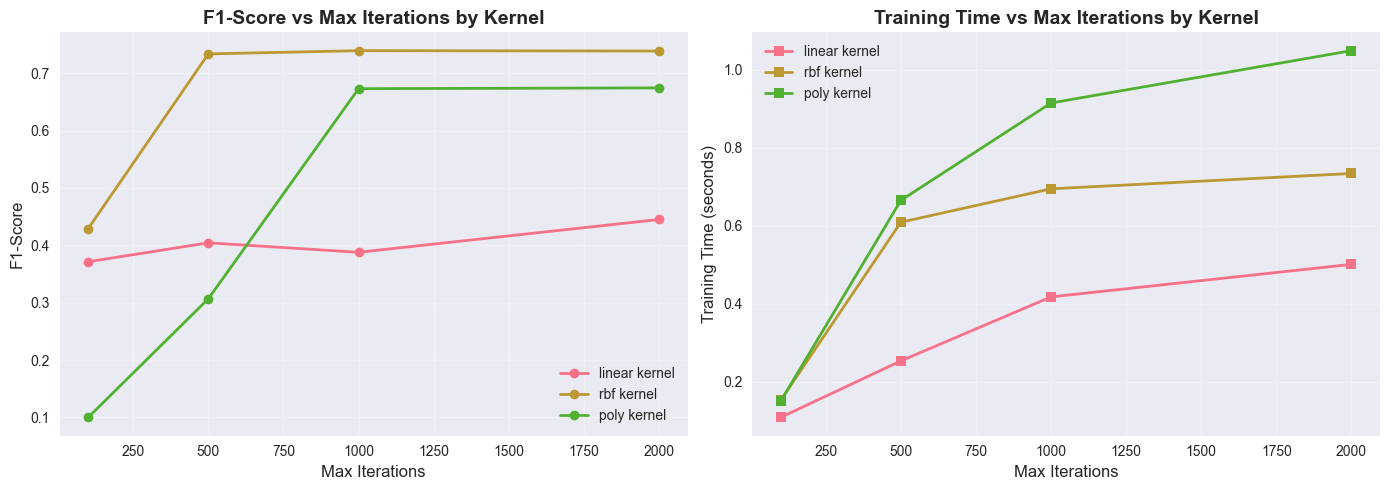

In [4]:
# Plot F1-score vs iterations for each kernel
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# F1-score plot
for kernel in kernels:
    kernel_data = results_df[results_df['kernel'] == kernel]
    axes[0].plot(kernel_data['max_iter'], kernel_data['f1_score'], 
                 marker='o', label=f'{kernel} kernel', linewidth=2)

axes[0].set_xlabel('Max Iterations', fontsize=12)
axes[0].set_ylabel('F1-Score', fontsize=12)
axes[0].set_title('F1-Score vs Max Iterations by Kernel', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Training time plot
for kernel in kernels:
    kernel_data = results_df[results_df['kernel'] == kernel]
    axes[1].plot(kernel_data['max_iter'], kernel_data['training_time'], 
                 marker='s', label=f'{kernel} kernel', linewidth=2)

axes[1].set_xlabel('Max Iterations', fontsize=12)
axes[1].set_ylabel('Training Time (seconds)', fontsize=12)
axes[1].set_title('Training Time vs Max Iterations by Kernel', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## Step 4: Task 2 - Find Optimal Parameters

Analyze results to determine optimal kernel and iteration count.



In [5]:
# Find best result
best_result = results_df.loc[results_df['f1_score'].idxmax()]

print("=" * 60)
print("Optimal Configuration")
print("=" * 60)
print(f"Kernel: {best_result['kernel']}")
print(f"Max Iterations: {int(best_result['max_iter'])}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-Score: {best_result['f1_score']:.4f}")
print(f"Training Time: {best_result['training_time']:.2f} seconds")

optimal_kernel = best_result['kernel']
optimal_max_iter = int(best_result['max_iter'])

# Show comparison table
print("\n" + "=" * 60)
print("Top 5 Configurations")
print("=" * 60)
top5 = results_df.nlargest(5, 'f1_score')[['kernel', 'max_iter', 'accuracy', 'f1_score', 'training_time']]
print(top5.to_string(index=False))



Optimal Configuration
Kernel: rbf
Max Iterations: 1000
Accuracy: 0.7200
Precision: 0.7599
Recall: 0.7200
F1-Score: 0.7394
Training Time: 0.69 seconds

Top 5 Configurations
kernel  max_iter  accuracy  f1_score  training_time
   rbf      1000  0.720000  0.739426       0.694628
   rbf      2000  0.719211  0.738784       0.733965
   rbf       500  0.710000  0.733775       0.608871
  poly      2000  0.648158  0.674542       1.049169
  poly      1000  0.649474  0.673153       0.914898


## Step 5: Task 3 - Vector Transformation Experiments

Experiment with different vector transformations.



In [6]:
# Experiment 1: Drop random dimensions
print("Experiment 1: Dropping random dimensions...")
drop_results = run_vector_transformation_experiments(
    X_train, y_train,
    X_test_split, y_test_split,
    model_type='SVM',
    kernel=optimal_kernel,
    optimal_max_iter=optimal_max_iter,
    transformation_type='drop_dimensions'
)

drop_df = pd.DataFrame(drop_results)
print("\nDrop dimensions results:")
print(drop_df[['param_value', 'new_dim', 'accuracy', 'f1_score']].to_string())



Experiment 1: Dropping random dimensions...

Transformation: drop 0 dimensions


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Transformation: drop 10 dimensions


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Transformation: drop 20 dimensions


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Transformation: drop 30 dimensions


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Transformation: drop 40 dimensions


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Transformation: drop 50 dimensions


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Drop dimensions results:
   param_value  new_dim  accuracy  f1_score
0            0      100  0.720000  0.739426
1           10       90  0.688158  0.721907
2           20       80  0.631842  0.678709
3           30       70  0.653421  0.688580
4           40       60  0.650000  0.685054
5           50       50  0.610789  0.666769


In [7]:
# Experiment 2: Reduce dimensionality with PCA
print("\nExperiment 2: Reducing dimensionality with PCA...")
reduce_results = run_vector_transformation_experiments(
    X_train, y_train,
    X_test_split, y_test_split,
    model_type='SVM',
    kernel=optimal_kernel,
    optimal_max_iter=optimal_max_iter,
    transformation_type='reduce_dim'
)

reduce_df = pd.DataFrame(reduce_results)
print("\nPCA reduction results:")
print(reduce_df[['param_value', 'new_dim', 'accuracy', 'f1_score']].to_string())




Experiment 2: Reducing dimensionality with PCA...

Transformation: reduce to 50 dimensions


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Transformation: reduce to 75 dimensions


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



PCA reduction results:
   param_value  new_dim  accuracy  f1_score
0           50       50  0.486579  0.486925
1           75       75  0.490526  0.490723


In [8]:
# Experiment 3: Add mathematical features
print("\nExperiment 3: Adding mathematical features...")
add_features_results = run_vector_transformation_experiments(
    X_train, y_train,
    X_test_split, y_test_split,
    model_type='SVM',
    kernel=optimal_kernel,
    optimal_max_iter=optimal_max_iter,
    transformation_type='add_features'
)

add_features_df = pd.DataFrame(add_features_results)
print("\nAdd features results:")
print(add_features_df[['new_dim', 'accuracy', 'f1_score']].to_string())




Experiment 3: Adding mathematical features...

Transformation: add mathematical features
Original dimension: 100, New dimension: 600


c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Add features results:
   new_dim  accuracy  f1_score
0      600  0.654211   0.70213


## Step 6: Visualize Transformation Results

Plot the impact of vector transformations on classification performance.



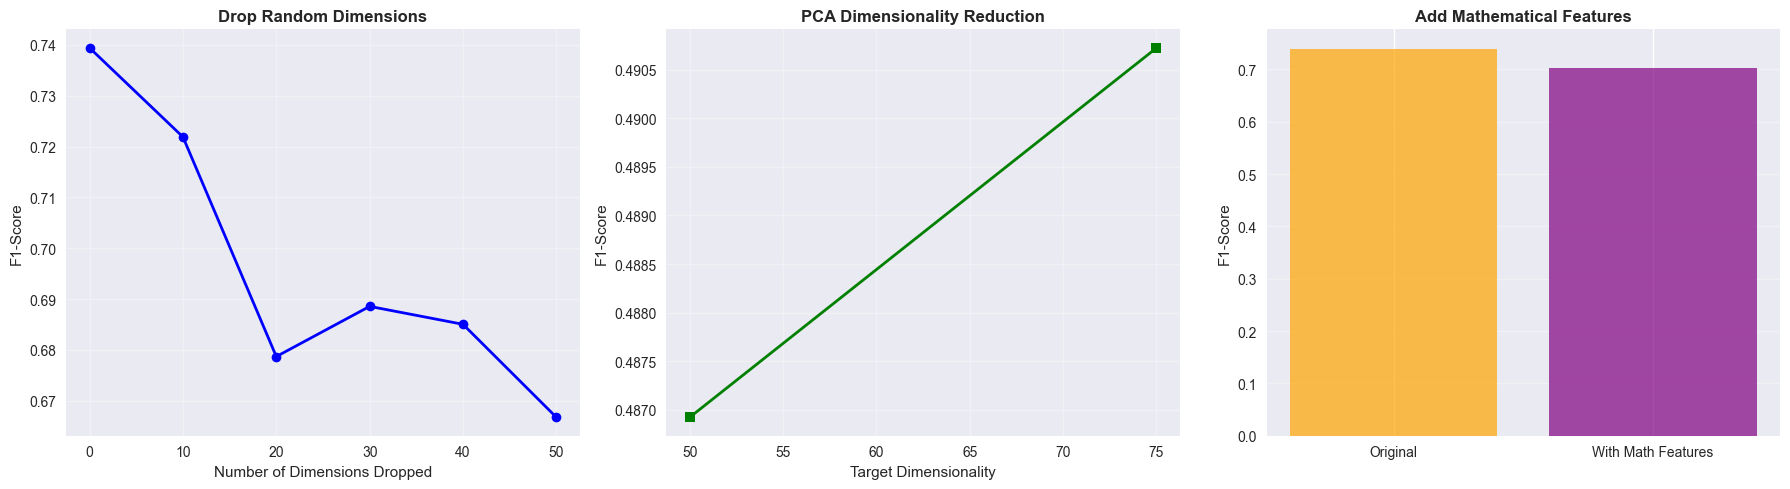

In [9]:
# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Drop dimensions plot
axes[0].plot(drop_df['param_value'], drop_df['f1_score'], marker='o', linewidth=2, color='blue')
axes[0].set_xlabel('Number of Dimensions Dropped', fontsize=11)
axes[0].set_ylabel('F1-Score', fontsize=11)
axes[0].set_title('Drop Random Dimensions', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# PCA reduction plot
axes[1].plot(reduce_df['param_value'], reduce_df['f1_score'], marker='s', linewidth=2, color='green')
axes[1].set_xlabel('Target Dimensionality', fontsize=11)
axes[1].set_ylabel('F1-Score', fontsize=11)
axes[1].set_title('PCA Dimensionality Reduction', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add features (single point)
if len(add_features_df) > 0:
    original_f1 = best_result['f1_score']
    new_f1 = add_features_df.iloc[0]['f1_score']
    axes[2].bar(['Original', 'With Math Features'], [original_f1, new_f1], 
                color=['orange', 'purple'], alpha=0.7)
    axes[2].set_ylabel('F1-Score', fontsize=11)
    axes[2].set_title('Add Mathematical Features', fontsize=12, fontweight='bold')
    axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

